In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score, matthews_corrcoef

### Učitavanje podataka

In [34]:
df = pd.read_csv("CBWDB.csv")

### Čišćenje podataka

In [35]:
le = LabelEncoder()# inicijalizacija enkodera

le.fit(df.loc[:,'Sex'])
df.loc[:,'Sex'] = le.transform(df.loc[:,'Sex']) #Transformiramo Sex u numerički oblik

le.fit(df.loc[:,'SEC'])
df.loc[:,'SEC'] = le.transform(df.loc[:,'SEC']) #Transformiramo SEC u numerički oblik

le.fit(df.loc[:,'Term/Preterm'])
df.loc[:,'Term/Preterm'] = le.transform(df.loc[:,'Term/Preterm']) #Transformiramo Term/Preterm u numerički oblik

C:\Users\muha\AppData\Local\Temp\ipykernel_9596\2337349399.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Sex'] = le.transform(df.loc[:,'Sex']) #Transformiramo Sex u numerički oblik
C:\Users\muha\AppData\Local\Temp\ipykernel_9596\2337349399.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'SEC'] = le.transform(df.loc[:,'SEC']) #Transformiramo SEC u numerički oblik
C:\Users\muha\AppData\Local\Temp\ipykernel_9596\2337349399.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inp

In [36]:
df.drop(('Bgroup'), axis=1, inplace = True)

# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
df.loc[df['Age(years)'].isna(),'Age(years)'] = df.loc[:,'Age(years)'].mean()

# ubaci srednju vrijednost visine tamo gdje nedostaje ta informacija
df.loc[df['Height(cm)'].isna(),'Height(cm)'] = df.loc[:,'Height(cm)'].mean()

# ubaci srednju vrijednost broja prethodnoh trudnoća tamo gdje nedostaje ta informacija
df.loc[df['Parity'].isna(),'Parity'] = df.loc[:,'Parity'].mean()

# ubaci srednju vrijednost ANC-a tamo gdje nedostaje ta informacija
df.loc[df['ANC'].isna(),'ANC'] = df.loc[:,'ANC'].mean()

# ubaci srednju vrijednost početne mase majke tamo gdje nedostaje ta informacija
df.loc[df['Iwt(kg)'].isna(),'Iwt(kg)'] = df.loc[:,'Iwt(kg)'].mean()

# ubaci srednju vrijednost konačne visine majke tamo gdje nedostaje ta informacija
df.loc[df['FWt(kg)'].isna(),'FWt(kg)'] = df.loc[:,'FWt(kg)'].mean()

# ubaci srednju vrijednost početnog sistoličkog tlaka tamo gdje nedostaje ta informacija
df.loc[df['IBP_sys'].isna(),'IBP_sys'] = df.loc[:,'IBP_sys'].mean()

# ubaci srednju vrijednost početnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
df.loc[df['IBP_dias'].isna(),'IBP_dias'] = df.loc[:,'IBP_dias'].mean()

# ubaci srednju vrijednost konačnog sistoličkog tlaka tamo gdje nedostaje ta informacija
df.loc[df['FBP_sys'].isna(),'FBP_sys'] = df.loc[:,'FBP_sys'].mean()

# ubaci srednju vrijednost konačnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
df.loc[df['FBP_dias'].isna(),'FBP_dias'] = df.loc[:,'FBP_dias'].mean()

# ubaci srednju vrijednost početne razine hemoglobina tamo gdje nedostaje ta informacija
df.loc[df['IHb(gm%)'].isna(),'IHb(gm%)'] = df.loc[:,'IHb(gm%)'].mean()

# ubaci srednju vrijednost konačne razine hemoglobina tamo gdje nedostaje ta informacija
df.loc[df['FHb(gm%)'].isna(),'FHb(gm%)'] = df.loc[:,'FHb(gm%)'].mean()

# ubaci srednju vrijednost razine šećera u krvi tamo gdje nedostaje ta informacija
df.loc[df['BS(RBS)'].isna(),'BS(RBS)'] = df.loc[:,'BS(RBS)'].mean()

# ubaci srednju vrijednost bebine mase tamo gdje nedostaje ta informacija
df.loc[df['BWt(kg)'].isna(),'BWt(kg)'] = df.loc[:,'BWt(kg)'].mean()

# postavi LNH na noramlan tamo gdje nedostaje ta informacija
df.loc[df['LNH'].isna(),'LNH'] = 2.0

#Izbaci NaN
df.dropna()

#izbacivanje stršećih vrijednosti
df = df[df['LNH'] < 3]
df = df[(df['BS(RBS)'] < 140) & (df['BS(RBS)'] > 40)]
df = df[(df['Age(years)'] < 50) & (df['Age(years)'] > 10)]
df = df[df['FHb(gm%)'] > 5]
df = df[df['IHb(gm%)'] > 5]
df = df[df['FBP_sys'] > 40]
df = df[df['FBP_dias'] > 40]
df = df[df['IBP_sys'] > 40]
df = df[df['IBP_dias'] > 40]
df = df[df['Height(cm)'] > 100]
df = df[df['FWt(kg)'] > 30]
df = df[df['Iwt(kg)'] > 30]

df.columns = ['SEC', 'Age(years)','Height(cm)','Parity','ANC', 'Iwt(kg)', 'FWt(kg)', 'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 'BS(RBS)', 'Term/Preterm', 'Sex', 'BWt(kg)', 'LNH']

In [38]:
X = df[df.columns[0:16]].values
y = df[df.columns[17]].values

In [39]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.3)

### Korištenje KNeighborsClassifier za klasifikaciju

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)
knn_predictions = knn_clf.predict(X_test)


### Izračun točnosti

In [41]:
print('Accuracy of the knn algorithm is: {}'.format(accuracy_score(y_test,knn_predictions)))

Accuracy of the knn algorithm is: 0.9083820662768031


In [42]:
confusion_matrix(y_test,knn_predictions)

array([[  0,  47],
       [  0, 466]], dtype=int64)

In [43]:
knn_clf.classes_

array([1., 2.])

### Prikaz matrice zabune

C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


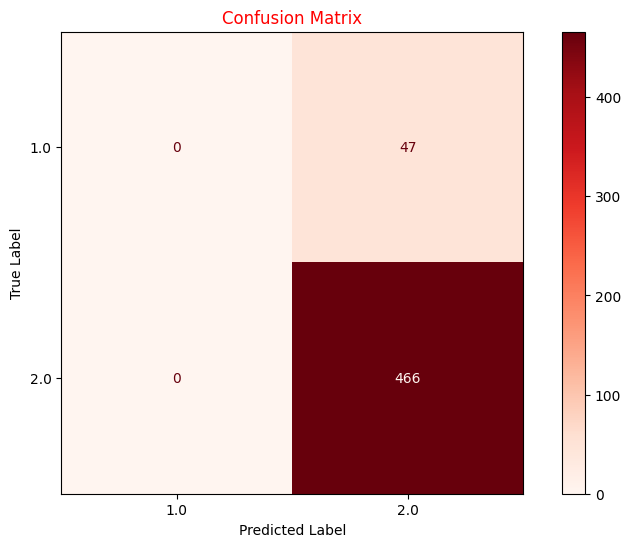

In [44]:
matrix = plot_confusion_matrix(knn_clf,X_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix',color='red')
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

### Pojedinačni prikaz metrika

Preciznost, odziv, F1 score

In [45]:
print("Precision Score : ",precision_score(y_test,knn_predictions,average='micro'))
print("Recall Score : ",recall_score(y_test, knn_predictions,average='micro'))

Precision Score :  0.9083820662768031
Recall Score :  0.9083820662768031


In [46]:
print("F1_score: ",f1_score(y_test,knn_predictions,average='micro'))

F1_score:  0.9083820662768031


In [47]:
print("Matthews_corrcoef: ",f1_score(y_test,knn_predictions,average='micro'))

Matthews_corrcoef:  0.9083820662768031


#### Uz opciju classification_report

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        47
         2.0       0.91      1.00      0.95       466

    accuracy                           0.91       513
   macro avg       0.45      0.50      0.48       513
weighted avg       0.83      0.91      0.86       513



C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: Undefin

### Cronbach alpha
Mjera prosječne korelacije ili konzistentnosti stavki u skupu

In [50]:
def cronbach_alpha(df):
    # 1. Računanje korelacijske matrice
    df_corr = df.corr()
    
    # 2. Računanje broja stavki
    N = df.shape[1]
    
    # 3. Računanje R - srednja korelacija između stavki
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 4. Izračun Cronbach alphe prema sljedećoj formuli
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [51]:
cronbach_alpha(df)

0.5142265182744842

In [52]:
df.corr()

,SEC,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
SEC,1.000000,0.001768,0.180967,0.170749,-0.096696,0.055395,-0.005254,0.280675,-0.082915,0.141646,-0.202713,-0.144943,-0.267627,-0.072271,0.545675,0.279469,-0.036608,0.107704
Age(years),0.001768,1.000000,0.062635,0.468588,-0.086173,0.152379,0.101193,0.030150,0.034199,0.031436,0.028038,-0.029997,-0.064666,-0.018019,0.039908,0.043683,0.059784,0.032027
Height(cm),0.180967,0.062635,1.000000,0.125180,-0.190227,0.107545,0.006409,0.097245,-0.003068,-0.003399,-0.130464,0.049075,0.033395,-0.037639,0.148870,0.100243,-0.060344,-0.055436
Parity,0.170749,0.468588,0.125180,1.000000,-0.086632,0.005302,-0.010662,0.043028,-0.035859,0.017738,-0.046028,-0.128680,-0.152447,-0.038331,0.161726,0.070335,-0.044530,0.009824
ANC,-0.096696,-0.086173,-0.190227,-0.086632,1.000000,-0.033941,0.251070,-0.097081,0.013390,0.156133,0.209323,0.055583,0.156584,0.111978,-0.379049,-0.396446,0.041597,-0.049836
Iwt(kg),0.055395,0.152379,0.107545,0.005302,-0.033941,1.000000,0.728868,0.283938,0.137842,0.213657,0.034246,0.109504,0.099744,0.001447,0.049538,0.026172,0.126770,0.014343
FWt(kg),-0.005254,0.101193,0.006409,-0.010662,0.251070,0.728868,1.000000,0.191394,0.124922,0.251975,0.115897,0.107339,0.179791,0.049486,-0.113260,-0.155221,0.163890,-0.004820
IBP_sys,0.280675,0.030150,0.097245,0.043028,-0.097081,0.283938,0.191394,1.000000,0.260265,0.357540,-0.101669,0.009859,0.005168,-0.011971,0.354389,0.200985,0.029870,0.046502
IBP_dias,-0.082915,0.034199,-0.003068,-0.035859,0.013390,0.137842,0.124922,0.260265,1.000000,0.115661,0.355932,0.099459,0.059407,0.028374,-0.044453,0.014079,-0.006355,-0.003753
FBP_sys,0.141646,0.031436,-0.003399,0.017738,0.156133,0.213657,0.251975,0.357540,0.115661,1.000000,0.373386,-0.014587,-0.004845,0.099919,0.102194,0.029810,0.080952,0.062449


U članku su korišteni algoritmi Gaussian Naive Bayes i Random FOrest, što je prikazano u nastavku.

## Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [54]:
GaussianNB()

GaussianNB()

In [55]:
pred = nb.predict(X_test)
r = recall_score(y_test, pred,average='micro')
print("Recall ", r)

Recall  0.7855750487329435


In [57]:
confusion_matrix(y_test,pred)

array([[ 17,  30],
       [ 80, 386]], dtype=int64)

In [59]:
print('Accuracy of the Gaussian Naive Bayes algorithm is: {}'.format(accuracy_score(y_test,pred)))

Accuracy of the Gaussian Naive Bayes algorithm is: 0.7855750487329435


C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


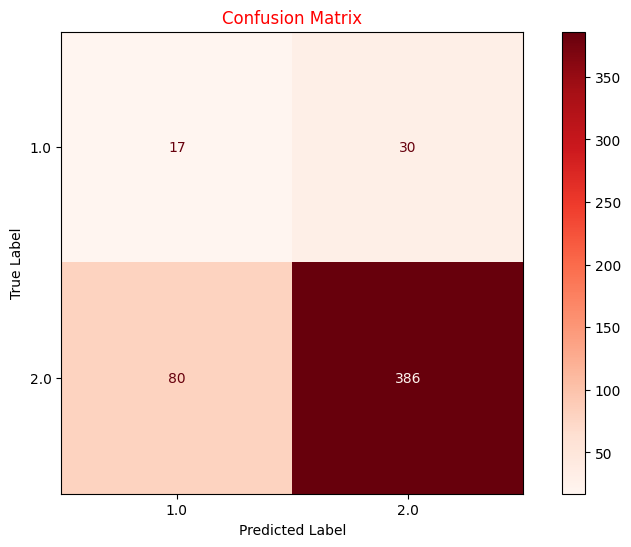

In [60]:
matrix = plot_confusion_matrix(nb,X_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix',color='red')
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predrf = clf.predict(X_test)
r = recall_score(y_test, predrf,average='micro')
print("Recall ", r)

Recall  0.9083820662768031


In [62]:
confusion_matrix(y_test,predrf)

array([[  0,  47],
       [  0, 466]], dtype=int64)

In [63]:
print('Accuracy of the Random Forest algorithm is: {}'.format(accuracy_score(y_test,predrf)))

Accuracy of the Random Forest algorithm is: 0.9083820662768031


C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


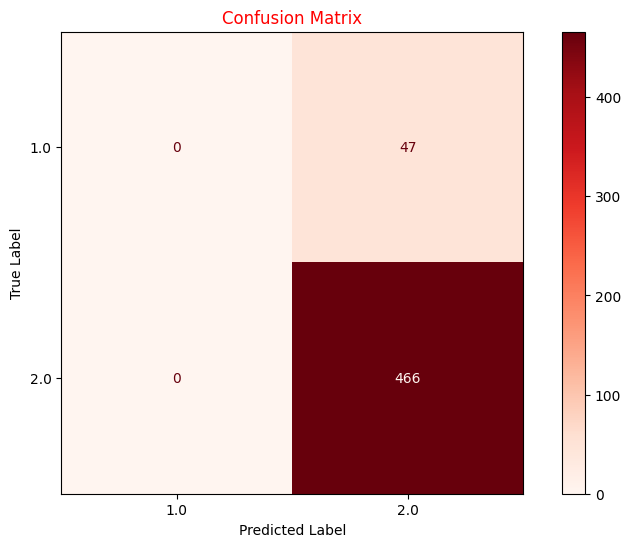

In [71]:
matrix = plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix',color='red')
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)